this notebook builds coupling matrixes and bias vectors using new dmrf objects

In [7]:
import numpy as np
from matplotlib import pyplot as plt
import pickle

from utils import complementary
import utils1

In [2]:
seq = 'GCGACGGACGGACGGAGC'

In [1]:
with open('gen_data/mod_dmrf_tetramer_20_1.dmrf', 'rb') as f:
    dmrfs_tet = pickle.load(f)
# with open('gen_data/dmrf_3_20.dmrf', 'rb') as f:
#     dmrfs_3 = pickle.load(f)
# with open('gen_data/dmrf_5_20.dmrf', 'rb') as f:
#     dmrfs_5 = pickle.load(f)

NameError: name 'pickle' is not defined

In [5]:
def check_(seq:str)->bool:
    if len(seq)<4:
        raise ValueError('The input sequence should be atleast 4 NA long.')
    else:
        seq = seq.upper()
        for s in seq:
            if s not in ['A','T','G','C']:
                raise ValueError('The sequence contains invalid characters.')

make another coupling matrix by removing one base from each side.
this will give 2 coupling matrixes for single sequence. the second coupling matrix captures the interactions missed by the first coupling matrix.
when looking at free energies, we could use both and get average value.

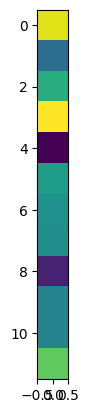

In [6]:
# make sure the sequence length is dividable from 2
seq = 'AGATGG'

len_ = len(seq)*2
seq = 'G'+seq+'G'

bias = np.zeros((len_), dtype=float)
for i in range(0,len(seq)-3, 2):
    s = seq[i:i+4]
    if s in dmrfs_tet.keys():
        b = np.mean([i.get_subsystem_biases() for i in dmrfs_tet[s]], axis=0)
    elif complementary(s) in dmrfs_tet.keys():
        b = np.fliplr(np.flipud(np.mean([i.get_subsystem_biases() for i in dmrfs_tet[complementary(s)]], axis=0)))
    
    bias[i:i+2] = b[:2]
    bias[-(2+i):len_-i] = b[2:]
    

# print(bias)
plt.imshow(bias.reshape(-1,1))

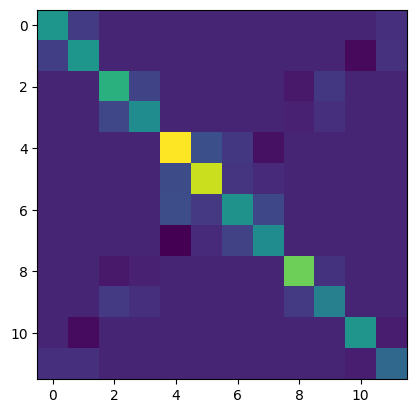

In [7]:
# make sure the sequence length is dividable from 2
seq = 'AGATGG'

len_ = len(seq)*2
seq = 'G'+seq+'G'

copuling = np.zeros((len_,len_), dtype=float)
for i in range(0,len(seq)-3, 2):
    s = seq[i:i+4]
    if s in dmrfs_tet.keys():
        c = np.mean([i.get_subsystem_couplings() for i in dmrfs_tet[s]], axis=0)
    elif complementary(s) in dmrfs_tet.keys():
        c = np.fliplr(np.flipud(np.mean([i.get_subsystem_couplings() for i in dmrfs_tet[complementary(s)]], axis=0)))
    
    copuling[i:i+2,i:i+2] = c[:2,:2]
    copuling[-(2+i):len_-i, -(2+i):len_-i] = c[2:,2:]
    copuling[i:i+2, len_-(2+i):len_-i] = c[:2,2:]
    copuling[len_-(2+i):len_-i, i:i+2] = c[2:,:2]
    

# print(copuling)
plt.imshow(copuling)

In [8]:
from dimgen import dim

In [10]:
with open('gen_data/mod_dmrf_tetramer_20_1.dmrf', 'rb') as f:
    dmrfs_tet = pickle.load(f)
x = dim('TCCCCTCTCCGT',dmrfs_tet)
x.get_free_energy().sum()
list_ = ['AAAA','AAAC','AAAT','AGAG','AGCG']
for i in list_:
    seq = 'GC'+i[:2]+i*3+'GC'
    print(dim(seq,dmrfs_tet).get_free_energy().sum())

73.65264037641941
75.52398590903556
72.06649987426243
58.35170222784281
67.77696737266324


In [11]:
with open('gen_data/mod_dmrf_tetramer_50_1.dmrf', 'rb') as f:
    dmrfs_tet = pickle.load(f)
x = dim('TCCCCTCTCCGT',dmrfs_tet)
x.get_free_energy().sum()
list_ = ['AAAA','AAAC','AAAT','AGAG','AGCG']
for i in list_:
    seq = 'GC'+i[:2]+i*3+'GC'
    print(dim(seq,dmrfs_tet).get_free_energy().sum())

73.591772712806
75.46906085373004
72.02044785121453
58.30057948271881
67.72631357324653


In [12]:
with open('gen_data/mod_dmrf_tetramer_100_1.dmrf', 'rb') as f:
    dmrfs_tet = pickle.load(f)
x = dim('TCCCCTCTCCGT',dmrfs_tet)
x.get_free_energy().sum()
list_ = ['AAAA','AAAC','AAAT','AGAG','AGCG']
for i in list_:
    seq = 'GC'+i[:2]+i*3+'GC'
    print(dim(seq,dmrfs_tet).get_free_energy().sum())

73.60610123550231
75.4499486327007
71.98384080856844
58.202945833431755
67.63146574471308


In [15]:
for j in range(5):
    with open(f'gen_data/dmrf_tetramer_20_{int(j+1)}.dmrf', 'rb') as f:
        dmrfs_tet = pickle.load(f)
    x = dim('TCCCCTCTCCGT',dmrfs_tet)
    x.get_free_energy().sum()
    list_ = ['AAAA','AAAC','AAAT','AGAG','AGCG']
    print(f'{int(j+1)}\n.......')
    for i in list_:
        seq = 'GC'+i[:2]+i*3+'GC'
        print(dim(seq,dmrfs_tet).get_free_energy().sum())
    print('.......')

1
.......
74.0082717723778
75.53335705048283
72.06729343469058
58.80349735239365
67.64758224189298
.......
2
.......
74.00798745750085
75.53282090839984
72.06701999690254
58.803101271411904
67.64717685874699
.......
3
.......
74.00420398426053
75.52485648545563
72.06254499289568
58.79755382136121
67.637865180481
.......
4
.......
73.94210101915723
75.4671054826531
72.01794457546097
58.74723926358839
67.53934476321947
.......
5
.......
74.00811097154983
75.58566619884814
72.02233741419806
58.8875493421071
67.92052313376561
.......
